In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import feature_selection
from sklearn import tree
from sklearn import utils
from sklearn import naive_bayes
import re

C:\Users\Pravash Ranjan\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
cd Desktop\Globsyn\dataset

C:\Users\Pravash Ranjan\Desktop\Globsyn\dataset


In [3]:
df=pd.read_csv("Interview.csv")
df.drop(["Unnamed: 23","Unnamed: 24","Unnamed: 25","Unnamed: 26","Unnamed: 27"],axis=1,inplace=True)
df.columns=["date","client","industry","location","position","skills","inter_type","ID","gender","curr_location","job_location",
           "venue","native_location","permission","hope","three_hours","alt_number","resume","clear_about_venue","letter","expected",
           "observed","married"]

In [4]:
df.date=df.date.str.replace(" ","")
df.date=df.date.str.replace(r'\d\d\d\d&\d\d\.\d\d\w\w',"2016")
df.date=df.date=df.date.str.replace("/",".")
df.date=df.date.str.replace(r'\WApr\W',".04.")
df.date=df.date.str.replace('Apr',".04.")
df.date=df.date.str.replace(r'\d\d\d\d&\d\.\d\d\w\w',"2016")
df.date=df.date.str.replace('-',".")
df.date=df.date.str.replace(r'\W16',".2016")
df.date=df.date.str.replace(r'\W15',".2015")
df.drop(df[df.date.isnull()].index,inplace=True)
import datetime
def conv(s):
    ar=str(s).split(".")
    try:
        d=datetime.date(int(ar[2]),int(ar[1]),int(ar[0]))
    except Exception:
        print(len(ar),s)
    return (d)
df["new_date"]=df.date.apply(conv)
df["new_date"]=pd.to_datetime(df.new_date)
df.drop(df[df.expected.isnull()].index,inplace=True)
df.drop("date",axis=1,inplace=True)
df.client.replace({"Standard Chartered Bank Chennai":"Standard Chartered Bank","Aon hewitt Gurgaon":"Aon Hewitt","Hewitt":"Aon Hewitt"},inplace=True)
df.industry.replace({"IT Products and Services":"IT","IT Services":"IT"},inplace=True)
df.location.replace({"CHENNAI":"Chennai","chennai":"Chennai","Gurgaonr":"Gurgaon","- Cochin- ":"Cochin","chennai ":"Chennai"},inplace=True)
df=df[df.new_date<'2019-01-01']
df.drop(df[(df.hope.isnull()) & (df.three_hours.isnull()) & (df.alt_number.isnull()) & (df.resume.isnull()) & (df.clear_about_venue.isnull())& (df.letter.isnull())].index,inplace=True)
df.observed.replace({"yes":"Yes","yes ":"Yes","no":"No","No ":"No","NO":"No","no ":"No"},inplace=True)
df.expected.replace({"yes":"Yes","11:00 AM":"Yes","10.30 Am":"Yes"},inplace=True)
df.letter.replace({"Havent Checked":"No","Need To Check":"No","Not sure":"No","Yet to Check":"No","Not Sure":"No","Not yet":"No",
                  "no":"No","na":"No","yes":"Yes","Na":"No"},inplace=True)
df.clear_about_venue.replace({"No- I need to check":"No","na":"No","yes":"Yes","Na":"No","no":"No"},inplace=True)
df.resume.replace({"No- will take it soon":"No","Not yet":"No","na":"No","yes":"Yes","Na":"No","Not Yet":"No"},inplace=True)
df.alt_number.replace({"No I have only thi number":"No","na":"No","yes":"Yes","Na":"No"},inplace=True)
df.three_hours.replace({"No Dont":"No","Na":"No","yes":"Yes"},inplace=True)
df.hope.replace({"Na":"No","yes":"Yes","Not Sure":"No","cant Say":"No","Not sure":"No"},inplace=True)
df.permission.replace({"Not yet":"No","Yet to confirm":"No","yes":"Yes","Na":"No"},inplace=True)
for i,s in df.iterrows():
    if (df["expected"][i]=="Uncertain"):
        df["expected"][i]=df["observed"][i]
df.permission.replace({"Yes":1,"No":0},inplace=True)
df.hope.replace({"Yes":1,"No":0},inplace=True)
df.three_hours.replace({"Yes":1,"No":0},inplace=True)
df.alt_number.replace({"Yes":1,"No":0},inplace=True)
df.resume.replace({"Yes":1,"No":0},inplace=True)
df.clear_about_venue.replace({"Yes":1,"No":0},inplace=True)
df.letter.replace({"Yes":1,"No":0},inplace=True)
df.expected.replace({"Yes":1,"No":0},inplace=True)
df.observed.replace({"Yes":1,"No":0},inplace=True)
df.married.replace({"Married":1,"Single":0},inplace=True)
df.drop(df[(df.permission.isnull()) | (df.hope.isnull()) | (df.three_hours.isnull()) | 
         (df.alt_number.isnull()) | (df.resume.isnull()) | (df.clear_about_venue.isnull()) |
        (df.letter.isnull()) | (df.expected.isnull()) | (df.observed.isnull())].index,inplace=True)
df.inter_type.replace({"Scheduled Walkin":"Scheduled","Scheduled ":"Scheduled","Scheduled Walk In":"Scheduled","Walkin ":"Walkin"},inplace=True)


In [ ]:
df.position.value_counts().sort_values(ascending=False)

In [5]:
loc=df.curr_location
ind=df.industry
cl=df.client
jbl=df.job_location
mar=df.married
X=df.drop(["ID","skills","new_date","native_location","curr_location","industry","client","job_location"],axis=1)
X.head()

,location,position,inter_type,gender,venue,permission,hope,three_hours,alt_number,resume,clear_about_venue,letter,expected,observed,married
0,Chennai,Production- Sterile,Scheduled,Male,Hosur,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,0,0
1,Chennai,Production- Sterile,Scheduled,Male,Hosur,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,0,0
3,Chennai,Production- Sterile,Scheduled,Male,Hosur,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0,0,0
4,Chennai,Production- Sterile,Scheduled,Male,Hosur,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0,0,1
5,Gurgaon,Selenium testing,Scheduled,Male,Gurgaon,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,0


In [6]:
pos = pd.get_dummies(X['position'],prefix='pos',drop_first=True)
X = pd.concat([X,pos],axis=1)
X.drop("position",axis=1,inplace=True)
X.gender.replace({"Male":1,"Female":0},inplace=True)
X.inter_type.replace({"Scheduled":1,"Walkin":0},inplace=True)
typ=pd.get_dummies(X.venue,prefix="ven",drop_first=True)
X=pd.concat([X,typ],axis=1)
X.drop("venue",axis=1,inplace=True)
loc.replace({"chennai":"Chennai","CHENNAI":"Chennai","chennai ":"Chennai","- Cochin- ":"Cochin"},inplace=True)
jbl.replace({"- Cochin- ":"Cochin"},inplace=True)
dum_loc=pd.get_dummies(loc,prefix="loc",drop_first=True)
dum_ind=pd.get_dummies(ind,prefix="ind",drop_first=True)
dum_jbl=pd.get_dummies(jbl,prefix="jbl",drop_first=True)
X=pd.concat([X,dum_loc,dum_ind,dum_jbl],axis=1)

In [7]:
X.drop("location",axis=1,inplace=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 1231
Data columns (total 40 columns):
inter_type                 981 non-null int64
gender                     981 non-null int64
permission                 981 non-null float64
hope                       981 non-null float64
three_hours                981 non-null float64
alt_number                 981 non-null float64
resume                     981 non-null float64
clear_about_venue          981 non-null float64
letter                     981 non-null float64
expected                   981 non-null int64
observed                   981 non-null int64
married                    981 non-null int64
pos_Dot Net                981 non-null uint8
pos_Niche                  981 non-null uint8
pos_Production- Sterile    981 non-null uint8
pos_Routine                981 non-null uint8
pos_Selenium testing       981 non-null uint8
pos_Trade Finance          981 non-null uint8
ven_Bangalore              981 non-null uint8
ven_Ch

In [8]:

rfe=feature_selection.RFE(LogisticRegression(),n_features_to_select=8)

In [9]:
y=X.observed
X.drop("observed",axis=1,inplace=True)
rfe.fit(X,y)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
  n_features_to_select=8, step=1, verbose=0)

In [10]:
cols=X.columns[rfe.get_support()]
cols

Index(['expected', 'pos_Niche', 'pos_Production- Sterile', 'pos_Routine',
       'ven_Hosur', 'ind_Electronics', 'ind_Telecom', 'jbl_Visakapatinam'],
      dtype='object')

In [ ]:
# NaiveBayes,KNN,Decision - response encoding

In [12]:
X1=X[cols]
X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=.15,random_state=42)
LR=LogisticRegression()
LR.fit(X_train,y_train)
print("Training Precison:",metrics.precision_score(y_train,LR.predict(X_train)))
print("Test Precision:",metrics.precision_score(y_test,LR.predict(X_test)))

Training Precison: 0.7519480519480519
Test Precision: 0.7099236641221374


In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.15,random_state=42)
try_all(X_train,X_test,y_train,y_test)

Index(['jbl_Hosur'], dtype='object')
n_features =  1
Training Precison: 0.6971153846153846
Test Precision: 0.6283783783783784
Index(['ven_Hosur', 'jbl_Hosur'], dtype='object')
n_features =  2
Training Precison: 0.6996381182147166
Test Precision: 0.6283783783783784
Index(['pos_Production- Sterile', 'ven_Hosur', 'jbl_Hosur'], dtype='object')
n_features =  3
Training Precison: 0.6996381182147166
Test Precision: 0.6283783783783784
Index(['pos_Production- Sterile', 'ven_Hosur', 'loc_Delhi', 'jbl_Hosur'], dtype='object')
n_features =  4
Training Precison: 0.6996381182147166
Test Precision: 0.6283783783783784
Index(['pos_Production- Sterile', 'pos_Selenium testing', 'ven_Hosur',
       'loc_Delhi', 'jbl_Hosur'],
      dtype='object')
n_features =  5
Training Precison: 0.6996381182147166
Test Precision: 0.6283783783783784
Index(['pos_Production- Sterile', 'pos_Selenium testing', 'ven_Hosur',
       'loc_Delhi', 'jbl_Cochin', 'jbl_Hosur'],
      dtype='object')
n_features =  6
Training Precison

In [69]:
from sklearn import feature_selection
def try_all(X_train,X_test,y_train,y_test):
    arr_tr=[]
    arr_ts=[]
    for i in range(1,40,1):
        rfe=feature_selection.RFE(naive_bayes.BernoulliNB(),n_features_to_select=i)
        rfe.fit(X_train,y_train)
        cols=X_train.columns[rfe.get_support()]
        #print(cols)
        X_train1=X_train[cols]
        X_test1=X_test[cols]
        #X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=.15,random_state=42)
        LR=naive_bayes.BernoulliNB()
        LR.fit(X_train1,y_train)
        #print("n_features = ",i)
        #print("Training Precison:",metrics.precision_score(y_train,LR.predict(X_train1)))
        #print("Test Precision:",metrics.precision_score(y_test,LR.predict(X_test1)))
        arr_tr.append(metrics.precision_score(y_train,LR.predict(X_train1)))
        arr_ts.append(metrics.precision_score(y_test,LR.predict(X_test1)))
    show("using RFE",arr_tr,arr_ts)
    

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X,y)
feature_importances = pd.DataFrame(rf.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
expected,0.214957
permission,0.171293
letter,0.065496
married,0.061852
gender,0.055010
pos_Niche,0.050418
alt_number,0.046053
resume,0.043891
ind_Pharmaceuticals,0.042308
inter_type,0.030828


In [47]:
def lr(X_1,X_2,y_1,y_2,f):
    
    model=naive_bayes.BernoulliNB()
    model.fit(X_1,y_1)
    #print("n_features = ",f)
    #print("Training Precison:",metrics.precision_score(y_1,model.predict(X_1)))
    #print("Test Precision:",metrics.precision_score(y_2,model.predict(X_2)))
    a=(metrics.precision_score(y_1,model.predict(X_1)))
    b=(metrics.precision_score(y_2,model.predict(X_2)))
    return a,b
    


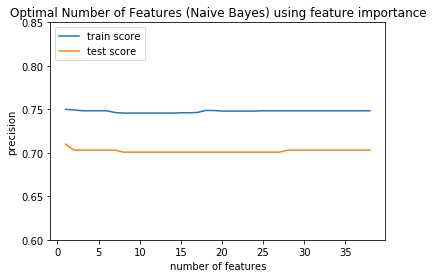

In [65]:
feat=feature_importances.index
arr_tr=[]
arr_ts=[]
for i in range(1,len(feat)):
    f=feat[:i]
    X_1=X_train[f]
    y_1=y_train
    X_2=X_test[f]
    y_2=y_test
    a,b=lr(X_1,X_2,y_1,y_2,f)
    arr_tr.append(a)
    arr_ts.append(b)
show("using feature importance",arr_tr,arr_ts)


In [68]:
def show(s,a,b):
    plt.plot(np.arange(1,40), a)
    plt.plot(np.arange(1,40), b)
    plt.xlabel('number of features')
    plt.ylabel('precision')
    plt.title("Optimal Number of Features (Naive Bayes) "+s)
    plt.legend(['train score', 'test score'], loc='upper left')
    plt.ylim(.60,.85)

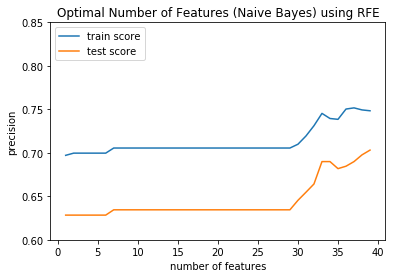

In [70]:
try_all(X_train,X_test,y_train,y_test)